### Aim: to forecast waterborne imports for OECD europe balance using the forward net short

In [1]:
import pandas as pd
from tshistory.api import timeseries
import requests, warnings
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

% matplotlib inline

In [2]:
tsa = timeseries('http://tst-qdev-ap9.petroineos.local/api')
server = 'https://TST-QDEV-AP1.petroineos.local:5001'
tsa = timeseries(URI)

In [339]:
# using tsa request to retrieve  series
oecd_imports = 'crude.kpler.oecd_europe.imports.kbd.monthly'
URI = 'http://tst-qdev-ap9.petroineos.local/api'
oecd_runs = 'crude.petroineos.oecd_europe.throughput.kbd.monthly.forecast'
oecd_production = 'crude.iea.oecd_europe.production.kbd.monthly.forecast'
druz = 'crude.petroineos.russia.oecd_europe.pipe_exports.kbd.monthly.forecast.full'
net_sh = 'crude.petroineos.oecd_europe.net_short.kbd.monthly.forecast'y

oecd_imports_series = tsa.get(oecd_imports)
oecd_runs_series  = tsa.get(oecd_runs)
oecd_prod_series = tsa.get(oecd_production)
druzbha = tsa.get(druz)
net_short = tsa.get(net_sh)

In [331]:
correlation = pd.merge(oecd_imports_series, net_short, right_index=True, left_index=True)

In [332]:
correlation_hist = correlation['2013-02-01':'2022-05-01'].copy()

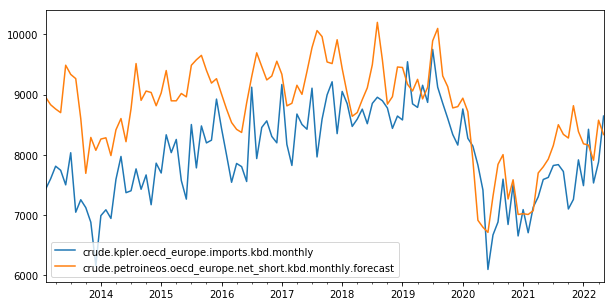

In [333]:
correlation_hist.plot(kind='line', figsize=(10,5))

In [334]:
# modeling OLS
x = correlation_hist['crude.petroineos.oecd_europe.net_short.kbd.monthly.forecast']
y = correlation_hist['crude.kpler.oecd_europe.imports.kbd.monthly']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         OLS Regression Results                                        
=======================================================================================================
Dep. Variable:     crude.kpler.oecd_europe.imports.kbd.monthly   R-squared:                       0.475
Model:                                                     OLS   Adj. R-squared:                  0.471
Method:                                          Least Squares   F-statistic:                     99.72
Date:                                         Wed, 15 Jun 2022   Prob (F-statistic):           4.21e-17
Time:                                                 23:08:16   Log-Likelihood:                -862.19
No. Observations:                                          112   AIC:                             1728.
Df Residuals:                                              110   BIC:                             1734.
Df Model:                                                    1                                         
Covariance Type:                                     nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                        2187.4913    585.334      3.737      0.000    1027.497    3347.486
crude.petroineos.oecd_europe.net_short.kbd.monthly.forecast     0.6648      0.067      9.986      0.000       0.533       0.797
==============================================================================
Omnibus:                        0.838   Durbin-Watson:                   1.024
Prob(Omnibus):                  0.658   Jarque-Bera (JB):                0.945
Skew:                          -0.140   Prob(JB):                        0.623
Kurtosis:                       2.648   Cond. No.                     1.01e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# # old correlations vs runs thorughput
# correlation_hist['y'] = correlation_hist['crude.petroineos.oecd_europe.throughput.kbd.monthly.forecast']*0.7157 + -334.1494

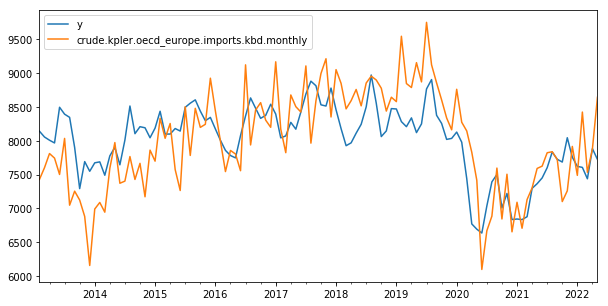

In [337]:
correlation_hist['y'] = correlation_hist['crude.petroineos.oecd_europe.net_short.kbd.monthly.forecast']*0.6702 + 2137.2517
correlation_hist.plot(kind='line', figsize=(10,5), y=['y', 'crude.kpler.oecd_europe.imports.kbd.monthly'])

In [15]:
net_short_ols_id = 'crude.kpler.oecd_europe.imports.kbd.monthly.forecast.ols'
net_short_ols = tsa.get(net_short_ols_id)
correlation_check = correlation_hist.merge(net_short_ols, right_index=True, left_index=True)

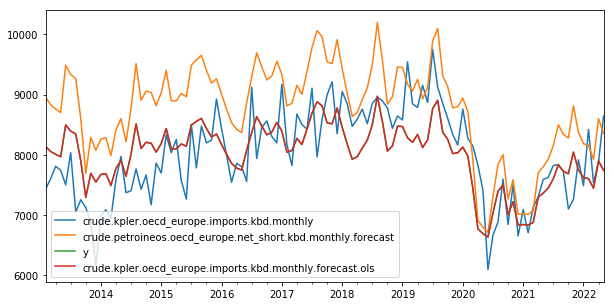

In [19]:
correlation_check.plot(kind='line', figsize=(10,5))

In [345]:
new_corr = correlation_hist.merge(druzbha, left_index=True, right_index=True)

In [348]:
new_corr.head()

crude.kpler.oecd_europe.imports.kbd.monthly  \
2013-02-01                                  7429.574893   
2013-03-01                                  7602.070548   
2013-04-01                                  7812.009767   
2013-05-01                                  7744.486452   
2013-06-01                                  7502.783500   

            crude.petroineos.oecd_europe.net_short.kbd.monthly.forecast  \
2013-02-01                                        8959.549286             
2013-03-01                                        8832.135806             
2013-04-01                                        8761.146333             
2013-05-01                                        8700.837742             
2013-06-01                                        9487.591333             

                      y  \
2013-02-01  8141.941631   
2013-03-01  8056.549117   
2013-04-01  8008.971973   
2013-05-01  7968.553155   
2013-06-01  8495.835412   

            crude.petroineos.russia.oecd_europe.pipe_exports.kbd.monthly.forecast.full  \
2013-02-01                                         993.976796                            
2013-03-01                                         967.914677                            
2013-04-01                                         950.226993                            
2013-05-01                                        1009.196765                            
2013-06-01                                         997.180530                            

            druzbha_short  
2013-02-01    7965.572489  
2013-03-01    7864.221129  
2013-04-01    7810.919340  
2013-05-01    7691.640977  
2013-06-01    8490.410803

In [347]:
new_corr['druzbha_short'] = new_corr['crude.petroineos.oecd_europe.net_short.kbd.monthly.forecast'] - new_corr['crude.petroineos.russia.oecd_europe.pipe_exports.kbd.monthly.forecast.full']

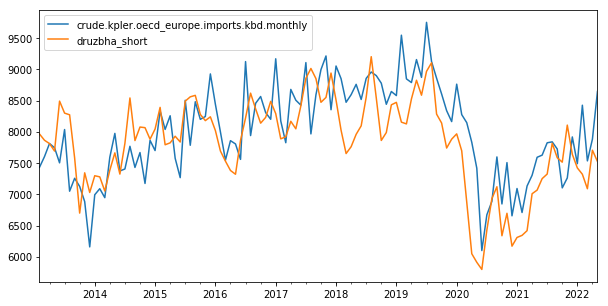

In [353]:
new_corr.plot(kind='line', figsize=(10,5), y=['crude.kpler.oecd_europe.imports.kbd.monthly', 'druzbha_short'])

In [355]:
# modeling OLS with druzbha
x = new_corr['druzbha_short']
y = new_corr['crude.kpler.oecd_europe.imports.kbd.monthly']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         OLS Regression Results                                        
=======================================================================================================
Dep. Variable:     crude.kpler.oecd_europe.imports.kbd.monthly   R-squared:                       0.506
Model:                                                     OLS   Adj. R-squared:                  0.502
Method:                                          Least Squares   F-statistic:                     112.7
Date:                                         Wed, 15 Jun 2022   Prob (F-statistic):           1.49e-18
Time:                                                 23:21:09   Log-Likelihood:                -858.82
No. Observations:                                          112   AIC:                             1722.
Df Residuals:                                              110   BIC:                             1727.
Df Model:                                                    1                                         
Covariance Type:                                     nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2297.3263    540.364      4.251      0.000    1226.452    3368.201
druzbha_short     0.7309      0.069     10.617      0.000       0.594       0.867
==============================================================================
Omnibus:                        0.519   Durbin-Watson:                   1.102
Prob(Omnibus):                  0.772   Jarque-Bera (JB):                0.661
Skew:                          -0.132   Prob(JB):                        0.719
Kurtosis:                       2.732   Cond. No.                     8.60e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [357]:
new_corr['y_new'] = new_corr['druzbha_short']*0.7309 + 2297.3293

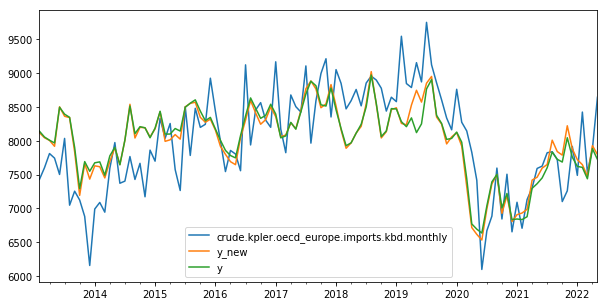

In [359]:
new_corr.plot(kind='line', figsize=(10,5), y=['crude.kpler.oecd_europe.imports.kbd.monthly', 'y_new', 'y'])

In [362]:
new_corr.head()

crude.kpler.oecd_europe.imports.kbd.monthly  \
2013-02-01                                  7429.574893   
2013-03-01                                  7602.070548   
2013-04-01                                  7812.009767   
2013-05-01                                  7744.486452   
2013-06-01                                  7502.783500   

            crude.petroineos.oecd_europe.net_short.kbd.monthly.forecast  \
2013-02-01                                        8959.549286             
2013-03-01                                        8832.135806             
2013-04-01                                        8761.146333             
2013-05-01                                        8700.837742             
2013-06-01                                        9487.591333             

                      y  \
2013-02-01  8141.941631   
2013-03-01  8056.549117   
2013-04-01  8008.971973   
2013-05-01  7968.553155   
2013-06-01  8495.835412   

            crude.petroineos.russia.oecd_europe.pipe_exports.kbd.monthly.forecast.full  \
2013-02-01                                         993.976796                            
2013-03-01                                         967.914677                            
2013-04-01                                         950.226993                            
2013-05-01                                        1009.196765                            
2013-06-01                                         997.180530                            

            druzbha_short        y_new  
2013-02-01    7965.572489  8119.366232  
2013-03-01    7864.221129  8045.288523  
2013-04-01    7810.919340  8006.330246  
2013-05-01    7691.640977  7919.149690  
2013-06-01    8490.410803  8502.970556

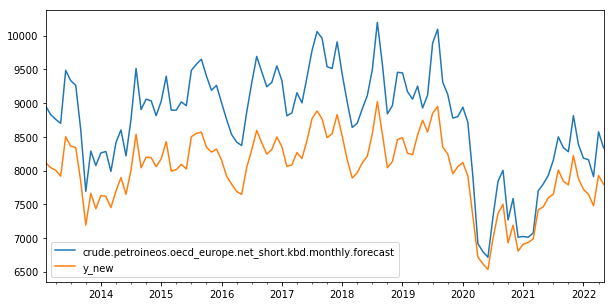

In [363]:
new_corr.plot(kind='line', figsize=(10,5), y=['crude.petroineos.oecd_europe.net_short.kbd.monthly.forecast', 'y_new'])

## regression and forecasting of regional flows